In [2]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras import layers, models, regularizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [3]:
# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
# Reshape the images to include the channel dimension (1 for grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [6]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28, 1)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [7]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

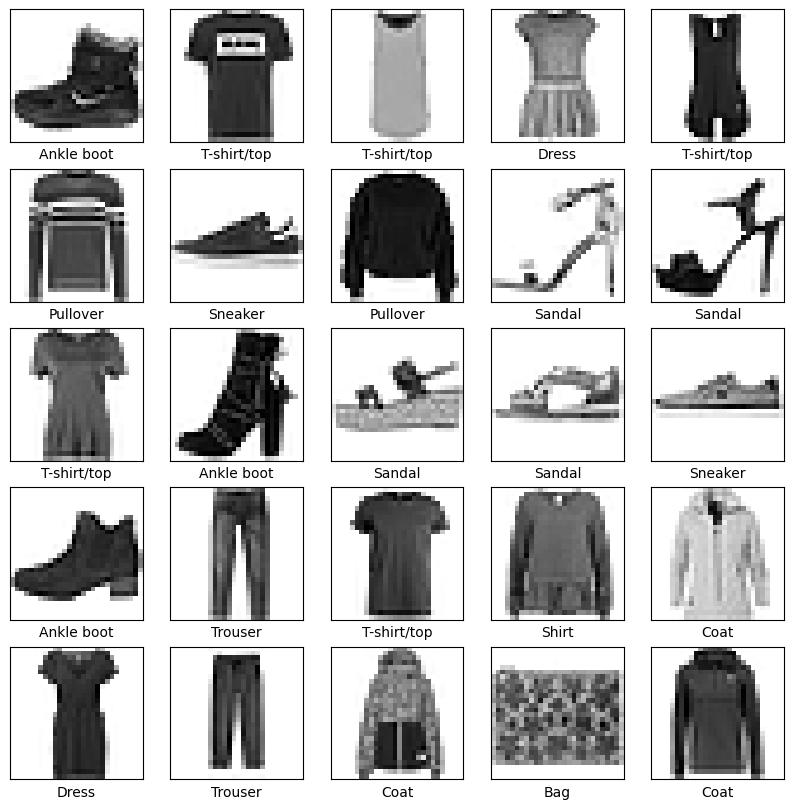

In [8]:
# Set up the figure for plotting
plt.figure(figsize=(10, 10))
# Loop to plot 25 images
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
# Normalize the images to [0, 1] range
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
# Convert labels to one-hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [11]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [12]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(train_images)

In [14]:
# Callbacks: EarlyStopping and LearningRateScheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
learning_rate_scheduler = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10))

In [15]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/50
938/938 [==============================] - 345s 364ms/step - loss: 2.7884 - accuracy: 0.6799 - val_loss: 1.1853 - val_accuracy: 0.7525 - lr: 0.0010
Epoch 2/50
938/938 [==============================] - 316s 337ms/step - loss: 1.1400 - accuracy: 0.7645 - val_loss: 1.0695 - val_accuracy: 0.7751 - lr: 9.0484e-04
Epoch 3/50
938/938 [==============================] - 330s 352ms/step - loss: 1.0312 - accuracy: 0.7907 - val_loss: 0.9038 - val_accuracy: 0.8354 - lr: 8.1873e-04
Epoch 4/50
938/938 [==============================] - 330s 352ms/step - loss: 0.9662 - accuracy: 0.8075 - val_loss: 0.8791 - val_accuracy: 0.8353 - lr: 7.4082e-04
Epoch 5/50
938/938 [==============================] - 331s 353ms/step - loss: 0.8979 - accuracy: 0.8193 - val_loss: 0.8186 - val_accuracy: 0.8541 - lr: 6.7032e-04
Epoch 6/50
938/938 [==============================] - 322s 343ms/step - loss: 0.8506 - accuracy: 0.8288 - val_loss: 0.7769 - val_accuracy: 0.8533 - lr: 6.0653e-04
Epoch 7/50
938/938 [======

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [17]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

313/313 - 20s - loss: 0.3829 - accuracy: 0.8946 - 20s/epoch - 65ms/step
Test Accuracy: 0.894599974155426


Text(0.5, 1.0, 'Loss Curves')

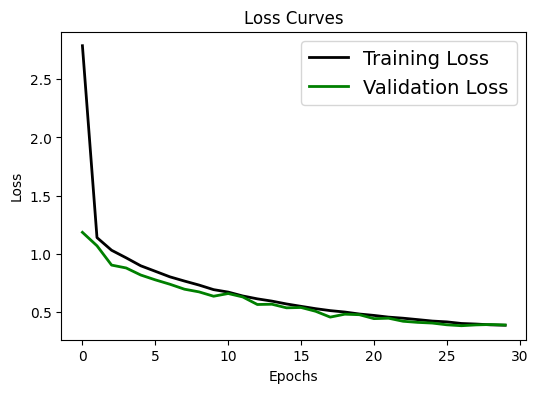

In [19]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

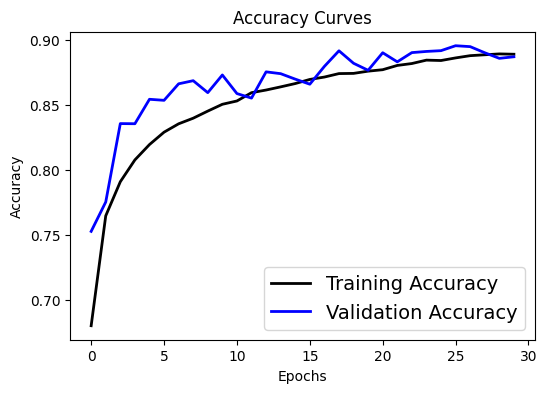

In [20]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [21]:
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 13s 41ms/step
[[1.30832149e-07 1.69588373e-06 3.52872540e-08 ... 1.39426789e-03
  8.47673527e-06 9.98226047e-01]
 [4.94538981e-05 1.19485591e-07 9.97006178e-01 ... 1.99387129e-09
  2.93959488e-06 3.79365844e-10]
 [1.47598575e-06 9.99902904e-01 2.53751259e-05 ... 1.89152865e-06
  5.07904133e-07 5.62660432e-07]
 ...
 [1.37033787e-12 5.42746403e-13 8.55062765e-13 ... 2.36177976e-14
  9.99999940e-01 1.06713825e-13]
 [2.57240163e-06 9.99910057e-01 2.87169132e-05 ... 9.74514478e-06
  5.85159160e-06 4.03158992e-06]
 [1.97380086e-06 1.17987111e-06 3.21960414e-07 ... 1.88336119e-01
  8.92767857e-04 4.66715952e-04]]
[9 2 1 ... 8 1 5]


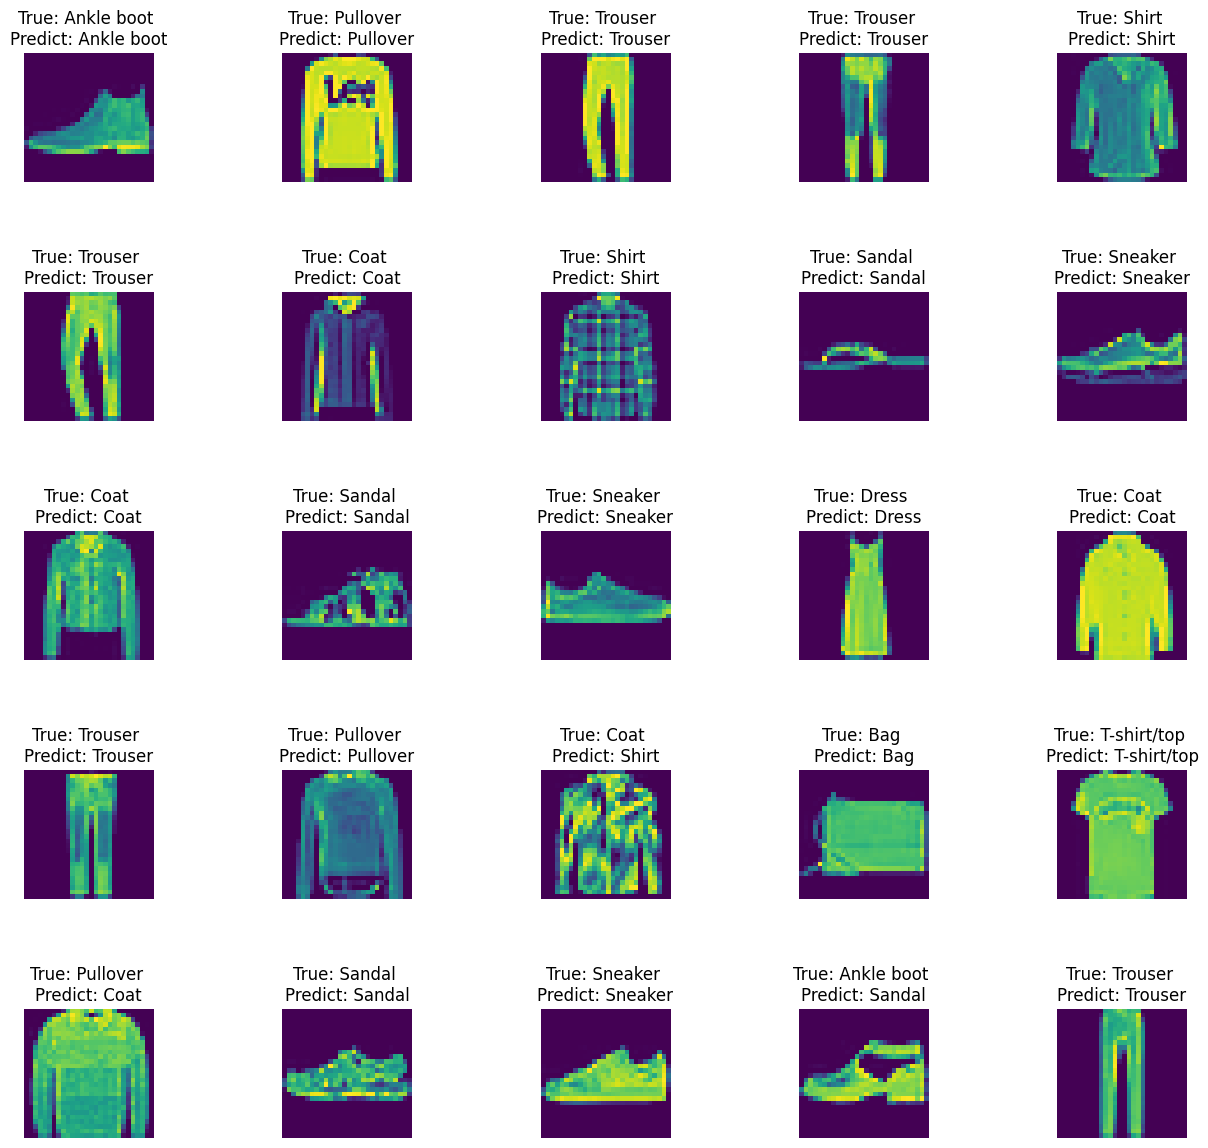

In [22]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [23]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
